## Seeing how our simple torch model performs.

In [3]:
# Imports!
# Mostly torch and torchvision utilities, with plotting and tqdm helpers.

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
import torch.optim as optim
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
# We'll assign the first GPU Device to our device variable.

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  # let's see what device we got

cpu


In [10]:
# Getting set to import our trained model.

# batch size of 1 so we can look at one image at time.
batch_size = 1


class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 784)
        self.fc2 = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.softmax(x, dim=1)
        return output

In [8]:
# putting the model on our GPU and loading in those trained weights.
model = SimpleNet().to( device )
model.load_state_dict( torch.load("mnist_fashion_SimpleNet.pt") )

<All keys matched successfully>

In [9]:
model.eval()

SimpleNet(
  (fc1): Linear(in_features=784, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=10, bias=True)
)

In [23]:
# using our loader as before - will have that same batch size of 1.

test_transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        ])


testset = datasets.FashionMNIST('./data', train=False,
                   transform=test_transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

testing_iterator = iter(test_loader) # create an iterator of our loader

# A dictionary to map our class numbers to their items.
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [34]:
def get_probs(model, x, y, device):
    """ Function to return the current probabilities of the classes given the model """
    model = model.to(device)
    x = x.to(device)
    y = y.to(device)
    
    with torch.no_grad():
        output = model(x)  # model classifies the input
        output = output.squeeze()
        
    # Return the list of probabilites and the probability of ground truth class
    return output, output[y] 

#### Okay, we should have everything we need now. Let's examine some data points and see how the model performs!

Run the below cell repeatedly to see if the model predicts the selected image correctly!

image shape is torch.Size([1, 28, 28])


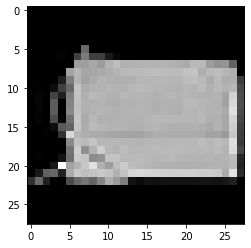

Model predicted: Bag with confidence % of 0.9192290902137756
Correct label is: Bag


In [46]:
image, label = testing_iterator.next()  # get one datapoint
image = image.squeeze(0)  # 'squeeze' out the tensor from the outer list.
print("image shape is", image.shape)

probs, gt_prob = get_probs(model, image, label, device)  # run model prediction


# plot our image
plt.imshow(image.view(28,28), cmap="gray") 
plt.show()

# what did the model predict?
max_label = torch.argmax(probs)
print("Model predicted:", labels_map[max_label.item()], "with confidence % of", probs[max_label.item()].item())
print("Correct label is:", labels_map[label.item()])
